In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Basics of tensorflow ?
1. ### Fundamentals of tensorflow 
    1. Data structure in TF
    1. Data flow graphs 
    1. tensorflow sessions 
    1. tensorflow placeholder
    1. tensorflow variables    
    
1. ### Forward propagation 
    1. all types of loss function 
    1. softmax vs cross entropy is same ? quick trick question let's who can explain me the difference 
    1. gradient descent 
    1. optimzers
    1. activation functions 
    1. Batching  and it's types 
1. ### tensorflow for classification and Regression
    1. Regularisation 
    1. Batch Normalization 
    1. Advance training algorithms

### import tensorflow 

In [ ]:
import tensorflow as tf

# Data structure
   * In Tensorflow we have tensor(fancy name for arrays with arbitary dimensions) for representing data and they array of varying dimensions
   * one dimensional array is called as vector in tensorflow it is refferred is 1d tensor same as for 2 dimensional space is called 2d Tensor even for cube it is refferred as 3d tensor so basically dimension is property that describe every tensor
   
   
![](https://miro.medium.com/max/1752/1*RiQ5LRM0CLfJToI3fk7VLA.png**)   

#### Q1. now one big question for all of is there any difference between data type vs tensorflow data type if yes then what is that and if no then why we can't define it like other 

# Dataflow Graph
*    basically to carry out operation in tensorflow it is done with the help of dataflow graphs / diagrams     (internally) whatever constants variables optimizer weights biases you define that flow within graphs and operations are performed on them when we define sessions and intiate them explicitly

*    graph contains 2 things node and edges , on node (operations performed) on edge (data-flows)

![](https://miro.medium.com/max/1200/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

#### as you can easily see internally in tensorflow how edges and node are used to carry out dataflow 

# Dataflow graph of NN 

![](https://images.techhive.com/images/article/2016/10/tensorflow-data-flow-100685891-large.idge.png)

#### Q2 Why dataflow graph came up as idea to tensorflow developers because when we have numpy and we can still build the model using numpy yes we can then why dataflow graphs? ask yourself or wait for live session 

# Tensorflow Session (switches to control your dataflow graphs)

#### so big picture in small words see in any tensorflow programme consists of 2 parts
1. Data-flow (series of tensorflow operations arranged of graph nodes)
1. Running computation graph in a session (encapsulates control and tensorflow runtime)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
# Create an empty graph, that will be filled with operation nodes later
main_graph=tf.Graph()


# Register this graph as default graph. 
# All operations within this context will become operation nodes in this graph
with main_graph.as_default():
    
    # Create two constants of value 5
    a=tf.constant(5.0)
    b=tf.constant(5.0)
    
    # Multiply the constants with each other
    c=tf.multiply(a,b)
    

# Create a session to execute the dataflow graph
with tf.Session(graph=main_graph) as session:
    
    # Perform the calculation defined in the dataflow graph and get the result
    output=session.run(c)
    print('Result of the multiplication: %d '%output)

# Tensorflow placeholders

#### How you will feed python external data ? in simple terms (x_train and x_test) how you will feed that data in dataflow graphs for that we need placeholders 
#### so with help of placeholders you can define graphs earlier and can feed the data later on that is possible because with the help of placeholders
#### so we define empty placeholder which will take data later training time and feed this data in data flow graphs

#### Q3 When python a array becomes a tensor after feeding in neural network or when the values  flows in dataflow graphs ?

#### now to feed data in place holder we just need a dictionary 

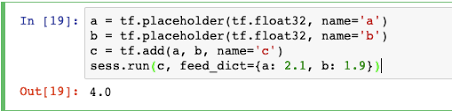

In [ ]:
# Create an empty graph, that will be filled with operation nodes later
main_graph=tf.Graph()

# Register this graph as default graph. 
# All operations within this context will become operation nodes in this graph
with main_graph.as_default():
    
    # Define the placeholders that will feed python arrays into the dataflow graph
    a=tf.placeholder(name='a', shape=[5], dtype=tf.float32)
    b=tf.placeholder(name='b', shape=[5], dtype=tf.float32)
    
    c=tf.multiply(a,b)
    
# Create a session to execute the dataflow graph
with tf.Session(graph=main_graph) as session:
    
    # Perform the calculation defined in the dataflow graph and get the result.
    # We must provide the values for the placeholders with "feed_dict" dictionary
    output=session.run(c, feed_dict={a: [5.0,7.0,3.0,9.0,2.0],
                                     b: [1.0,2.0,4.0,8.0,4.0],
                                     })
    print(output)

   

# Carrying out Forward Propagation (TF variables)
* for defining weight matrix and biases we need another concept to learn called as tensorflow variables 

** Note placeholder and constant can also define tensor same as tf variables 
but why need it ?

see till now we haven't considered any trainable paramters which are getting dynamically changes up after every iteration , with help of constants by definition it is constant and place-holder to feed data which again a mapped dict so now need different tensor whose values is always a variable (dynamic change requires) from their concept came up of tensor variables



#### now here are 2 things first we have tf.Variable() and another is .get_variable() the first one takes up intial values and second one take random values from a probability distribution of our choice for training weights second method is considered more rather than first because we want our weights to be random during initalization


### how to initialize any varibale (how to send them) in the dataflow graph
### so when dataflow graph is executed in session variables are initialized but for that any variable in data flow graph you wanna intialize is done with tf.global_variables_intializer() 

In [ ]:
# Import numpy for some array reshaping
import numpy as np

# Create an empty graph, that will be filled with operation nodes later
main_graph=tf.Graph()

# Register this graph as default graph. 
# All operations within this context will become operation nodes in this graph
with main_graph.as_default():
    # Placeholder for data input
    input_=tf.placeholder(dtype=tf.float32, shape=[1,5], name='input')
    
    ###Define the weight matrices###
    # Weight matrix, that connects the input and the 1st hidden layer
    W1=tf.get_variable(name='W1', shape=[5,10], initializer=tf.random_normal_initializer)
    # Weight matrix, that connects the 1st hidden layer and the 2nd hidden layer
    W2=tf.get_variable(name='W2', shape=[10,10], initializer=tf.random_normal_initializer)
    # Weight matrix, that connects the 2nd hidden layer and the 3rd hidden layer
    W3=tf.get_variable(name='W3', shape=[10,10], initializer=tf.random_normal_initializer)
    # Weight matrix, that connects the 3rd hidden layer and the output layer
    W4=tf.get_variable(name='W4', shape=[10,3], initializer=tf.random_normal_initializer)
         
    ####Define the forward propagation operations###
      
    #1st hidden layer
    z1=tf.matmul(input_, W1)
    a1=tf.nn.tanh(z1)
    
    #2nd hidden layer
    z2=tf.matmul(a1, W2)
    a2=tf.nn.tanh(z2)
    
    #3rd hidden layer
    z3=tf.matmul(a2, W3)
    a3=tf.nn.tanh(z3)
    
    #output layer
    z_out=tf.matmul(a3, W4)
    output=tf.nn.tanh(z_out)


# Create a session to execute the dataflow graph   
with tf.Session(graph=main_graph) as sess:
    
    # Initialize the weight matrix
    sess.run(tf.global_variables_initializer())
    
    # Define some random input
    x=np.array([1.0, 2.5, 0.7, 3.0, 9.0]).reshape([1,5])
    
    # Start the forward propagation step
    prediction=sess.run(output, feed_dict={input_: x})
    
    print('\n\n\nResult of the forward propagation: \n')
    print(prediction)


### people familiar with forward propagation can understand this code

### to make it as you can see that (sess) will initialize everything above it 

### to initialze anything we need to use sess.run() (* not to forget point)

# Moving on 2nd part of this tutorial

#### So here tutorial is all about components which we need to understand how to call them and setup with feed forward propagation (NN)  

## Mse use case 

In [ ]:
# Import numpy for some array reshaping
import numpy as np

# Create an empty graph, that will be filled with operation nodes later
main_graph=tf.Graph()

# Register this graph as default graph. 
# All operations within this context will become operation nodes in this graph
with main_graph.as_default():
    
    # Placeholder for the input data
    input_= tf.placeholder(dtype=tf.float32, shape=[1,3], name='input')
    # Placeholder for the label
    label = tf.placeholder(dtype=tf.float32, shape=[1,2], name='label')
    
    # Define a 3x2 weight matrix
    W=tf.get_variable(name='weights', shape=[3,2], dtype=tf.float32)
    
    # Compute a forward propagation step
    output=tf.nn.tanh(tf.matmul(input_, W))
    
    # Use build-in function for the mean squared error loss
    loss_op=tf.losses.mean_squared_error(labels=label, predictions=output)
    

# Create a session to execute the dataflow graph

with tf.Session(graph=main_graph) as sess:
    
    # Initialize the weight matrix
    sess.run(tf.global_variables_initializer())
    
    # Define some random input (x) and a label (y)
    # Reshape the arrays into the shape of the placeholders
    x=np.reshape([10.0,3.0,4.0], [1,3])
    y=np.reshape([5.0,2.0], [1,2])

    # Compute the prediction of the network
    nn_output=sess.run(output, feed_dict={input_: x})

    # Compute the mean squared error loss
    mse_loss=sess.run(loss_op, feed_dict={input_: x,
                                         label: y})
    print('\n\n\nOutput of the neural network: \n')
    print(nn_output)
    
    print('\nMean squared error loss: %.2f'%mse_loss)

## Cross entropy and sparse cross entropy example 

In [ ]:
# Import numpy for some array reshaping
import numpy as np

# Create an empty graph, that will be filled with operation nodes later
main_graph=tf.Graph()

# Register this graph as default graph. 
# All operations within this context will become operation nodes in this graph
with main_graph.as_default():
    
    # Placeholder for the input data
    input_= tf.placeholder(dtype=tf.float32, shape=[1,3], name='input')
    # Placeholder for the scalar label
    label = tf.placeholder(dtype=tf.int32, shape=[1], name='label_sparse')
    # Placeholder for the one-hot-encoded label
    label_ohe = tf.placeholder(dtype=tf.float32, shape=[1,5], name='label_one_hot_encoded')

    # Define a 3x5 weight matrix
    W=tf.get_variable(name='weights', shape=[3,5], dtype=tf.float32)
    
    # Forward propagation without an activation function
    logits=tf.matmul(input_, W)
    
    # Cross entropy loss operation, that requires the one-hot-encoded label
    loss_op=tf.nn.softmax_cross_entropy_with_logits_v2(labels=label_ohe, 
                                                       logits=logits, 
                                                       name='cross_entropy_loss')

    # Cross entropy loss operation, that requires the scalar label
    loss_op_sparse=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label, 
                                                                  logits=logits, 
                                                                  name='sparse_cross_entropy_loss')


# Create a session to execute the dataflow graph
with tf.Session(graph=main_graph) as sess:
    
    # Initialize the weight matrix
    sess.run(tf.global_variables_initializer())
    
    # Define some random input (x)
    x=np.reshape([10.0,3.0,4.0], [1,3])
    
    # Define the scalar label 
    y=np.reshape([2], [1])
    # The same label but one-hot-encoded version of it
    y_ohe=np.reshape([0,0,1,0,0], [1,5])
    
    # Run the one cross entropy loss operation
    loss=sess.run(loss_op, feed_dict={input_:x, 
                                      label_ohe: y_ohe
                                      })
    
    # Run the other cross entropy loss operation
    sparse_loss=sess.run(loss_op_sparse, feed_dict={input_:x,
                                                    label: y
                                                    })
    
    print('\n\n\nCross entropy loss: %.2f'%loss)
    print('Sparse cross entropy loss: %.2f'%sparse_loss)

## Gradient descent example

In [ ]:
# Import numpy for some array reshaping
import numpy as np

# Create an empty graph, that will be filled with operation nodes later
main_graph=tf.Graph()

# Register this graph as default graph. 
# All operations within this context will become operation nodes in this graph
with main_graph.as_default():
    
    # Placeholder for data input
    input_=tf.placeholder(dtype=tf.float32, shape=[1,5], name='input')
    # Placeholder for the label
    labels=tf.placeholder(dtype=tf.float32, shape=[1,1], name='labels')

    # Define a 5x1 weight matrix
    W=tf.get_variable(name='weights', shape=[5,1])
    
    # Forward propagation
    forward=tf.nn.tanh(tf.matmul(input_, W))

    # Mean squared error loss function
    loss=tf.losses.mean_squared_error(labels, forward)
    
    # Define the instance of the class that performs the gradient descent step
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
    
    # Get all trainable parameters of the network (here: the weight matrix W)
    trainable_variables=tf.trainable_variables()
    
    # Compute the gradients of the loss function with respect to the weights
    gradients= tf.gradients(loss, trainable_variables)
    
    # Perform the gradient descent step.
    # The input argument are tuples. Each tuple is a pair of the gradient and the weight 
    # that was used to calculate this gradient
    update_step=optimizer.apply_gradients(zip(gradients, trainable_variables))
     
    
    #Alternative Solution 
    update_step_alternative=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
       
    
    
# Create a session to execute the dataflow graph   
with tf.Session(graph=main_graph) as sess:
    
    # Initialize the weight matrix
    sess.run(tf.global_variables_initializer())
    
    # Define some random input and a label
    x=np.array([1,1,0,2,5]).reshape([1,5])
    y=np.array([2]).reshape([1,1]) 
    
    # Perform one single gradient descent step
    sess.run(update_step, feed_dict={input_: x,
                                     labels: y
                                     }) 

## Code for Neural network regression must see example

In [ ]:
import numpy as np
from random import shuffle

# list that will contain our training set
training_data=[]

# How many digits should this binary number have?
n=11
    
#Mini-batch size
batch_size=16

print('\n\nGeneration of Data...\n') 
for i in np.arange(2048):
    
    # Create a binary number of type string
    b = bin(i)[2:]
    l = len(b)
    b = str(0) * (n - l) + b  

    # Convert the binary string number to type float
    features=np.array(list(b)).astype(float)
    
    # Create and normalize the corresponding decimal label
    label=float(i)/2047
    
    # Put the feature-label instance into the list
    training_data.append([features, label])
    
    if (i>=1 and i<11) or (i>=2038):
        print('binary number: %s, decimal number: %d' %(b, i))
        
# shuffle the data
shuffle(training_data)  

# convert the list to np.array     
training_data=np.array(training_data)


#%%

# Get the next mini-batch of training samples
def get_next_batch(n_batch):
    
    # Get the next mini-batch of training samples from the dataset
    features=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),0]
    labels=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),1]
    
    # Reshape the list of arrays into a nxn np.array
    features = np.concatenate(features).reshape([batch_size,11])  
    # Reshape the labels 
    labels=np.reshape(labels, [batch_size,1])
    
    return features, labels
    
features, labels=get_next_batch(n_batch=1)

print(features)
print(labels)
#%%  

# Create the training graph
main_graph=tf.Graph()

with main_graph.as_default():
    
    # Define the placeholders for the features and the labels
    x=tf.placeholder(dtype=tf.float32,shape=[batch_size,11], name='features')
    y=tf.placeholder(dtype=tf.float32, shape=[batch_size,1], name='labels')
           
    # Create the weight matrices and the bias vectors 
    initializer=initializer=tf.random_normal_initializer(mean=0.0, stddev=0.25)
   
    W1=tf.get_variable('W1',shape=[11,50], initializer=initializer)
    W2=tf.get_variable('W2',shape=[50,25], initializer=initializer)
    W3=tf.get_variable('W3',shape=[25,1], initializer=initializer)
    
    b1=tf.get_variable('b1',shape=[50], initializer=initializer)
    b2=tf.get_variable('b2',shape=[25], initializer=initializer)

    ### Define the forward propagation step ###
    
    # First hidden layer
    z1=tf.matmul(x,W1)+b1
    a1=tf.nn.tanh(z1)
    
    # Second hidden layer
    z2=tf.matmul(a1,W2)+b2
    a2=tf.nn.tanh(z2)
    
    # Outputlayer
    predict_op=tf.nn.relu(tf.matmul(a2,W3))
    
    # Define the loss function
    loss_op=tf.losses.mean_squared_error(y,predict_op)
       
    # Perform a gradient descent step
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
    trainable_parameters = tf.trainable_variables()
    gradients = tf.gradients(loss_op,trainable_parameters)
    update_step = optimizer.apply_gradients(zip(gradients, trainable_parameters))


print('\n\nStart of the training...\n')
with tf.Session(graph=main_graph) as sess:
    
    sess.run(tf.global_variables_initializer())

    # How many mini-batches in total?
    num_batches=int(2048/batch_size)
    
    loss=0

    #Iterate over the entire training set for 10 times
    for epoch in range(10):
            
        # Iterate over the number of mini-batches
        for n_batch in range(num_batches-1):
            
            # Get the next mini-batches of samples for the training set
            features, labels=get_next_batch(n_batch)
              
            # Perform the gradient descent step on that mini-batch and compute the loss value
            _, loss_=sess.run((update_step, loss_op), feed_dict={x:features, y:labels})   
            loss+=loss_
             
        print('epoch_nr.: %i, loss: %.3f' %(epoch,(loss/num_batches)))
        loss=0 

    # Compute the prediction on the last mini-batch
    prediction=sess.run(predict_op, feed_dict={x:features})
    
    # Iterate over the features and labels from the last mini-batch as well as
    # the predicitons made by the network, and compare them to check the performance
    for f, l, p in zip(features, labels, prediction):
        
        # Rescale the predictions and labels back into their original value range
        p=p*2047
        l=l*2047
        
        print('Binary number: %s,  label: %i, prediciton %i' %(str(f), l,p))

## Code for Neural network for classification

In [ ]:
import numpy as np
from random import shuffle

# list that will contain our training set
training_data=[]

# How many digits should this binary number have?
n=4
    
#Mini-batch size
batch_size=8

print('\n\nGeneration of Data...\n') 
for i in np.arange(0, 10):
    
    # Create a binary number of type string
    b = bin(i)[2:]
    l = len(b)
    b = str(0) * (n - l) + b  

    # Convert binary string number to type float
    features=np.array(list(b)).astype(float)
    # Create the corresponding binary label / class
    label=i
    
    # Put the feature-label pair into the list
    training_data.append([features, label])

    print('binary number: %s, decimal number: %d' %(b, i))
        
    
#%%
# shuffle the data
shuffle(training_data)  

training_data=training_data*1000

# convert the list to np.array     
training_data=np.array(training_data)



#%%

# Get the next mini-batch of training samples
def get_next_batch(n_batch):
    
    # Get the next mini-batch of training samples from the dataset
    features=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),0]
    labels=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),1]
    
    # Reshape the list of arrays into a nxn np.array
    features = np.concatenate(features).reshape([batch_size, 4])  
    # Reshape the labels 
    labels=np.reshape(labels, [batch_size])
    
    return features, labels
    
features, labels=get_next_batch(n_batch=1)

print('\n\nMini-batch of features: \n')
print(features)
print('\n\nMini-batch of labels: \n')
print(labels)

#%%  

# Create the training graph
main_graph=tf.Graph()

with main_graph.as_default():
    
    # Define the placeholders for the features and the labels
    x=tf.placeholder(dtype=tf.float32,shape=[batch_size, 4], name='features')
    y=tf.placeholder(dtype=tf.int32, shape=[batch_size], name='labels')
           
    # Create the weight matrices and the bias vectors 
    initializer=initializer=tf.random_normal_initializer(mean=0.0, stddev=0.25)
   
    W1=tf.get_variable('W1',shape=[4,50], initializer=initializer)
    W2=tf.get_variable('W2',shape=[50,25], initializer=initializer)
    W3=tf.get_variable('W3',shape=[25,10], initializer=initializer)
    
    b1=tf.get_variable('b1',shape=[50], initializer=initializer)
    b2=tf.get_variable('b2',shape=[25], initializer=initializer)

    ### Define the forward propagation step ###
    
    # First hidden layer
    z1=tf.matmul(x,W1)+b1
    a1=tf.nn.tanh(z1)
    
    # Second hidden layer
    z2=tf.matmul(a1,W2)+b2
    a2=tf.nn.tanh(z2)
    
    # Outputlayer, without an activation function (input for the loss function)
    logits=tf.matmul(a2,W3)
       
    # Compute the probability scores after the training)
    probs=tf.nn.softmax(logits)
    
    # Define the loss function
    loss_op=tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
       
    # Perform a gradient descent step
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
    trainable_parameters = tf.trainable_variables()
    gradients = tf.gradients(loss_op,trainable_parameters)
    update_step = optimizer.apply_gradients(zip(gradients, trainable_parameters))


print('\n\nStart of the training...\n')
with tf.Session(graph=main_graph) as sess:
    
    sess.run(tf.global_variables_initializer())

    # How many mini-batches in total?
    num_batches=int(10000/batch_size)
    
    loss=0

    #Iterate over the entire training set for 10 times
    for epoch in range(10):
            
        # Iterate over the number of mini-batches
        for n_batch in range(num_batches-1):
            
            # Get the next mini-batches of samples for the training set
            features, labels=get_next_batch(n_batch)
              
            # Perform the gradient descent step on that mini-batch and compute the loss value
            _, loss_=sess.run((update_step, loss_op), feed_dict={x:features, y:labels})   
            
            loss+=loss_
             
        print('epoch_nr.: %i, loss: %.3f' %(epoch,(loss/num_batches)))
        loss=0 
    
    
    print('\n\nTesting the neural network:\n')
    # Compute the probability scores for the last mini-batch
    prob_scores=sess.run(probs, feed_dict={x:features, y:labels})
    
    # Iterate over the features and labels from the last mini-batch as well as
    # the predicitons made by the network, and compare them to check the performance
    for f, l, p in zip(features, labels, prob_scores):
    
        # Get the class with the highest probability score
        predicted_class=np.argmax(p)
        # Get the actual probability score
        predicted_class_score=np.max(p)
     
        print('Binary number: %s, decimal number: %i, predicted_class: %i, predicted_prob_score: %.3f' 
              %(str(f), l, predicted_class, predicted_class_score))

## Dropout example

In [ ]:
import numpy as np
from random import shuffle

# list that will contain our training set
training_data=[]

# How many digits should this binary number have?
n=11
    
#Mini-batch size
batch_size=16

print('\n\nGeneration of Data...\n') 
for i in np.arange(2048):
    
    # Create a binary number of type string
    b = bin(i)[2:]
    l = len(b)
    b = str(0) * (n - l) + b  

    # Convert the binary string number to type float
    features=np.array(list(b)).astype(float)
    
    # Create and normalize the corresponding decimal label
    label=float(i)/2047
    
    # Put the feature-label instance into the list
    training_data.append([features, label])
    
    if (i>=1 and i<11) or (i>=2038):
        print('binary number: %s, decimal number: %d' %(b, i))
        
# shuffle the data
shuffle(training_data)  

# convert the list to np.array     
training_data=np.array(training_data)


#%%

# Get the next mini-batch of training samples
def get_next_batch(n_batch):
    
    # Get the next mini-batch of training samples from the dataset
    features=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),0]
    labels=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),1]
    
    # Reshape the list of arrays into a nxn np.array
    features = np.concatenate(features).reshape([batch_size,11])  
    # Reshape the labels 
    labels=np.reshape(labels, [batch_size,1])
    
    return features, labels
    
features, labels=get_next_batch(n_batch=1)

print(features)
print(labels)
#%%  

# Create the training graph
main_graph=tf.Graph()

with main_graph.as_default():
    
    # Define the placeholders for the features and the labels
    x=tf.placeholder(dtype=tf.float32,shape=[batch_size,11], name='features')
    y=tf.placeholder(dtype=tf.float32, shape=[batch_size,1], name='labels')
           
    # Create the weight matrices and the bias vectors 
    initializer=initializer=tf.random_normal_initializer(mean=0.0, stddev=0.25)
   
    W1=tf.get_variable('W1',shape=[11,50], initializer=initializer)
    W2=tf.get_variable('W2',shape=[50,25], initializer=initializer)
    W3=tf.get_variable('W3',shape=[25,1], initializer=initializer)
    
    b1=tf.get_variable('b1',shape=[50], initializer=initializer)
    b2=tf.get_variable('b2',shape=[25], initializer=initializer)

    ### Define the forward propagation step with Dropout ###
    
    z1=tf.matmul(x,W1)+b1
    a1=tf.nn.tanh(z1)
    a1_dropout= tf.nn.dropout(a1, rate=0.25)
    
    z2=tf.matmul(a1_dropout,W2)+b2
    a2=tf.nn.tanh(z2)
    a2_dropout= tf.nn.dropout(a2, rate=0.25)
    
    # Outputlayer
    predict_op=tf.nn.relu(tf.matmul(a2_dropout,W3))
    
    # Define the loss function
    loss_op=tf.losses.mean_squared_error(y,predict_op)
       
    # Perform a gradient descent step
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
    trainable_parameters = tf.trainable_variables()
    gradients = tf.gradients(loss_op,trainable_parameters)
    update_step = optimizer.apply_gradients(zip(gradients, trainable_parameters))


print('\n\nStart of the training...\n')
with tf.Session(graph=main_graph) as sess:
    
    sess.run(tf.global_variables_initializer())

    # How many mini-batches in total?
    num_batches=int(2048/batch_size)
    
    loss=0

    #Iterate over the entire training set for 10 times
    for epoch in range(10):
            
        # Iterate over the number of mini-batches
        for n_batch in range(num_batches-1):
            
            # Get the next mini-batches of samples for the training set
            features, labels=get_next_batch(n_batch)
              
            # Perform the gradient descent step on that mini-batch and compute the loss value
            _, loss_=sess.run((update_step, loss_op), feed_dict={x:features, y:labels})   
            loss+=loss_
             
        print('epoch_nr.: %i, loss: %.3f' %(epoch,(loss/num_batches)))
        loss=0 

    # Compute the prediction on the last mini-batch
    prediction=sess.run(predict_op, feed_dict={x:features})
    
    # Iterate over the features and labels from the last mini-batch as well as
    # the predicitons made by the network, and compare them to check the performance
    for f, l, p in zip(features, labels, prediction):
        
        # Rescale the predictions and labels back into their original value range
        p=p*2047
        l=l*2047
        
        print('Binary number: %s,  label: %i, prediciton %i' %(str(f), l,p))

## L2 regularisation example 

In [ ]:
import numpy as np
from random import shuffle

# list that will contain our training set
training_data=[]

# How many digits should this binary number have?
n=11
    
#Mini-batch size
batch_size=16

print('\n\nGeneration of Data...\n') 
for i in np.arange(2048):
    
    # Create a binary number of type string
    b = bin(i)[2:]
    l = len(b)
    b = str(0) * (n - l) + b  

    # Convert the binary string number to type float
    features=np.array(list(b)).astype(float)
    
    # Create and normalize the corresponding decimal label
    label=float(i)/2047
    
    # Put the feature-label instance into the list
    training_data.append([features, label])
    
    if (i>=1 and i<11) or (i>=2038):
        print('binary number: %s, decimal number: %d' %(b, i))
        
# shuffle the data
shuffle(training_data)  

# convert the list to np.array     
training_data=np.array(training_data)


#%%

# Get the next mini-batch of training samples
def get_next_batch(n_batch):
    
    # Get the next mini-batch of training samples from the dataset
    features=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),0]
    labels=training_data[n_batch*batch_size:(batch_size*(1+n_batch)),1]
    
    # Reshape the list of arrays into a nxn np.array
    features = np.concatenate(features).reshape([batch_size,11])  
    # Reshape the labels 
    labels=np.reshape(labels, [batch_size,1])
    
    return features, labels
    
features, labels=get_next_batch(n_batch=1)

print(features)
print(labels)
#%%  

# Create the training graph
main_graph=tf.Graph()

with main_graph.as_default():
    
    # Define the placeholders for the features and the labels
    x=tf.placeholder(dtype=tf.float32,shape=[batch_size,11], name='features')
    y=tf.placeholder(dtype=tf.float32, shape=[batch_size,1], name='labels')
           
    # Create the weight matrices and the bias vectors 
    initializer=initializer=tf.random_normal_initializer(mean=0.0, stddev=0.25)
   
    W1=tf.get_variable('W1',shape=[11,50], initializer=initializer)
    W2=tf.get_variable('W2',shape=[50,25], initializer=initializer)
    W3=tf.get_variable('W3',shape=[25,1], initializer=initializer)
    
    b1=tf.get_variable('b1',shape=[50], initializer=initializer)
    b2=tf.get_variable('b2',shape=[25], initializer=initializer)

    ### Define the forward propagation step ###
    
    # First hidden layer
    z1=tf.matmul(x,W1)+b1
    a1=tf.nn.tanh(z1)
    
    # Second hidden layer
    z2=tf.matmul(a1,W2)+b2
    a2=tf.nn.tanh(z2)
    
    # Outputlayer
    predict_op=tf.nn.relu(tf.matmul(a2,W3))
    
	
	
	#### L2-Regularization ####
	
	# Collect the weight matrices
    weight_matrices=[var for var in tf.trainable_variables() if 'bias' not in var.name] 
	#Apply the L2 regularization to the weight matrices
    l2_losses=[tf.nn.l2_loss(w) for w in weight_matrices]
    l2_loss = tf.add_n(l2_losses)
    
	# Regularization rate
    alpha=0.1
    
	# Add the L2 regularization to the regular loss function
    loss_op=tf.losses.mean_squared_error(y,predict_op)+alpha*l2_loss
	
	########
       
    # Perform a gradient descent step
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
    trainable_parameters = tf.trainable_variables()
    gradients = tf.gradients(loss_op,trainable_parameters)
    update_step = optimizer.apply_gradients(zip(gradients, trainable_parameters))


print('\n\nStart of the training...\n')
with tf.Session(graph=main_graph) as sess:
    
    sess.run(tf.global_variables_initializer())

    # How many mini-batches in total?
    num_batches=int(2048/batch_size)
    
    loss=0

    #Iterate over the entire training set for 10 times
    for epoch in range(10):
            
        # Iterate over the number of mini-batches
        for n_batch in range(num_batches-1):
            
            # Get the next mini-batches of samples for the training set
            features, labels=get_next_batch(n_batch)
              
            # Perform the gradient descent step on that mini-batch and compute the loss value
            _, loss_=sess.run((update_step, loss_op), feed_dict={x:features, y:labels})   
            loss+=loss_
             
        print('epoch_nr.: %i, loss: %.3f' %(epoch,(loss/num_batches)))
        loss=0 

    # Compute the prediction on the last mini-batch
    prediction=sess.run(predict_op, feed_dict={x:features})
    
    # Iterate over the features and labels from the last mini-batch as well as
    # the predicitons made by the network, and compare them to check the performance
    for f, l, p in zip(features, labels, prediction):
        
        # Rescale the predictions and labels back into their original value range
        p=p*2047
        l=l*2047
        
        print('Binary number: %s,  label: %i, prediciton %i' %(str(f), l,p))

### so after this we will move forward with advance modules of tensorflow
### whole purpose of next module is designing ETL (Extract Transformation Load) so that we can fasten training process to next level to increase cpu gpu parallelization